Basic Statistics with Python
---
*Author: Prof. Yusuke Toyama*


---
***Contents***:

1. [Introduction](#Introduction)
    1. [Which statistical test to use?](#Which-statistical-test-to-use?) (YouTube video)
2. [Use example data set](#Use-example-data-set)
    1. [Plot data](#Histograms-Plots)
    2. [Check normal distribution](#Check-normal-distribution)
    3. [Statistical test](#Statistical-test-:-T-test)
3. [Use real data](#Use-real-data)
    1. [Read data](#Read-data)
    2. [Select & plot data](#Select-&-plot-data)
    3. [Check normality](#Check-normality)
    4. [Mann-Whitney U test](#Mann-Whitney-U-test)
    5. [Wilcoxon signed-rank test](#Wilcoxon-signed-rank-test)
    6. [Plotting and saving](#Plotting-and-saving-graphs)
        1. [Task \#1](#Task-\#1)
        2. [Task \#2](#Task-\#2)

---
>***Tip***: Enable numbered headings in Jupyter Lab by pressing "Table of Concents" and "Toggle Auto-Numbering"
>
> <img src="../images/jupyter_TOC.jpg" width="170">
---

# Introduction

## Which statistical test to use?

 Watch the following YouTube video:
 
 "Choosing a Statistical Test", [https://www.youtube.com/watch?v=ulk_JWckJ78](https://www.youtube.com/watch?v=ulk_JWckJ78)

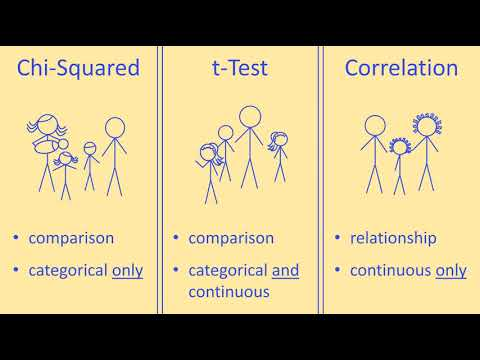

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ulk_JWckJ78", width=640, height=360)

>***Note***: *Please carefully listen to the section starting from 8:15*

# Use example data set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Preparing example data

np.random.seed(10)    # NumPy pseudo-random number generator. 
group1 = stats.poisson.rvs(loc=38, mu=35, size=20)
group2 = stats.poisson.rvs(loc=28, mu=25, size=30)
group3 = stats.poisson.rvs(loc=40, mu=5, size=100)

print( group1.mean() )
print( group2.mean() )
print( group3.mean() )

73.3
51.666666666666664
44.51


## Histograms Plots

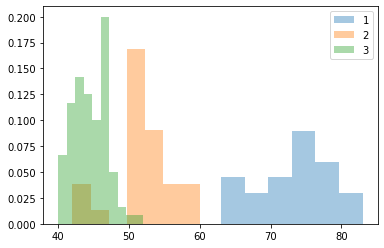

In [4]:
plt.hist(group1, bins='auto', label='1', alpha=.4, density=True)
plt.hist(group2, bins='auto', label='2', alpha=.4, density=True)
plt.hist(group3, bins='auto', label='3', alpha=.4, density=True)
plt.legend()
plt.show()

## Check normal distribution

In [5]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

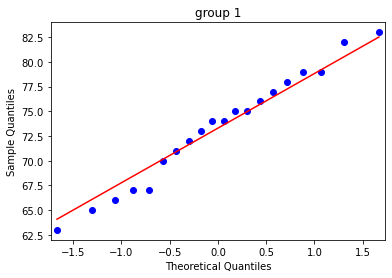

In [6]:
# QQ Plot
data = group1

# q-q plot
qqplot(data, line='s')
plt.title('group 1')
plt.show()

In [7]:
# Shapiro-Wilk Test for normality test
from scipy.stats import shapiro

# shapiro_test
shapiro_test = shapiro(data)
p = shapiro_test.pvalue
print('p=%.3f' % p)
#stat, p = shapiro(data)
#print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p=0.800
Sample looks Gaussian (fail to reject H0)


---
same for **group 2**

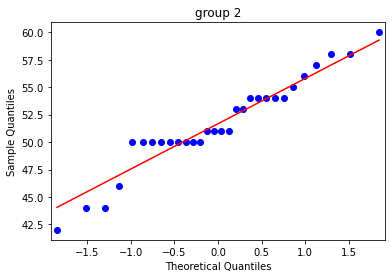

In [8]:
# QQ Plot
data = group2

# q-q plot
qqplot(data, line='s')
plt.title('group 2')
plt.show()

In [9]:
# Shapiro-Wilk Test for normality test
from scipy.stats import shapiro

# shapiro_test
shapiro_test = shapiro(group2)
p = shapiro_test.pvalue
print('p=%.3f' % p)

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p=0.132
Sample looks Gaussian (fail to reject H0)


---
and **group 3**

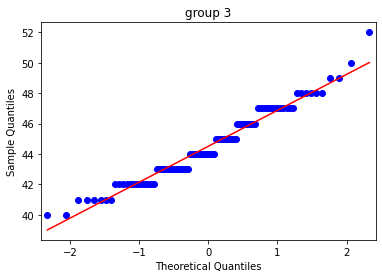

p=0.008
Sample does not look Gaussian (reject H0)


In [10]:
# QQ Plot
qqplot(group3, line='s')
plt.title('group 3')
plt.show()

# Shapiro-Wilk Test for normality test
from scipy.stats import shapiro

# shapiro_test
shapiro_test = shapiro(group3)
p = shapiro_test.pvalue
print('p=%.3f' % p)

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

---
**A quick note about Shapiro-Wilk Test**
> *`scipy.stats.shapiro` help says that "p-value may not be accurate for N > 5000." This could be the reason when Teng Xiang tried Shapiro-Wilk Test with large sample number, it gave him a p-value of 0.000.*
---

## Statistical test : T-test

In [11]:
# Unpaired T-test
stats.ttest_ind(group1, group2, equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=14.616904234020383, pvalue=7.498198486705426e-16)

In [12]:
# Paired T-test
# stats.ttest_rel(group1, group2) # will result in error if groups have different sizes

In [13]:
print(f'Groups have {"same" if group1.shape==group2.shape else "different"} sizes:')
print('group1 :',group1.shape)
print('group2 :',group2.shape)

Groups have different sizes:
group1 : (20,)
group2 : (30,)


---
**A note on paired tests**:
> "Paired T-test" assumes samples are paired (dependent samples) i.e. not independent, *e.g. blood pressure readings for the same individual*.
---

# Use real data

## Read data
> Read "Hara recoil mod.xls" as we did last week

In [14]:
import pandas as pd

In [15]:
df = pd.read_excel('../python_tylab_data/Hara recoil mod.xls',sheet_name='values', header=[1],skipfooter=2)
df

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
0,140408,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,0.922346,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding
1,140411,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,1.025202,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting
2,NaN,5.0,NaN,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,1.463130,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding
3,NaN,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,1.153178,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable
4,140415,1.0,NaN,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,1.165847,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NaN,5.0,1.0,-0.041680,0.331127,342312.570,324246.374,349983.413,358232.317,340960.487,...,1.027012,49.168,39.962,1.230369,1.1-1.5,148.299,148.299,NaN,NaN,Contracting
170,NaN,6.0,1.0,-0.047443,0.342908,270851.181,311600.716,261834.724,251960.733,271580.440,...,0.970773,62.273,47.413,1.313416,1.1-1.5,117.646,117.646,NaN,NaN,Contracting
171,NaN,7.0,1.0,-0.052361,0.599994,286922.025,276689.076,288493.637,349425.503,367075.189,...,0.879189,64.061,44.721,1.432459,1.1-1.5,116.565,116.565,NaN,NaN,Contracting
172,NaN,8.0,1.0,-0.022246,0.638493,253561.268,232911.064,239602.088,263550.028,226892.507,...,0.822534,62.303,45.310,1.375039,1.1-1.5,-112.036,67.964,NaN,NaN,Contracting


## Select & plot data
> Select the recoil speeds with 
>    1) Rn = '1.0-1.1' & Behavior 'Expanding', and 
>    2) Rn = '1.0-1.1' & Behavior 'Contracting'

In [16]:
# selecting recoil speed with Rn '1.0-1.1' and Behavior 'Expanding'
strt_mask = df['Rn']=='1.0-1.1' # Straight junctions
expn_mask = df['Behavior']=='Expanding' # Expanding junctions

straight_expand = df['recoil speed [um/sec]'][strt_mask & expn_mask]
straight_expand.head()

2     0.452162
7     0.288298
11    0.165716
16    0.210144
17    0.673083
Name: recoil speed [um/sec], dtype: float64

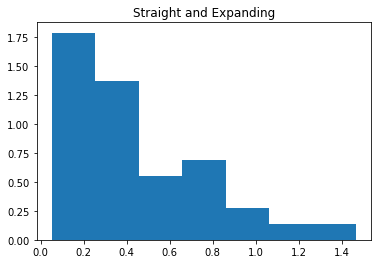

In [17]:
# Plot data
plt.hist(straight_expand, bins='auto', density=True);
plt.title('Straight and Expanding');

In [18]:
# selecting recoil speed with Rn '1.0-1.1' and Behavior 'Contracting'
strt_mask = df['Rn']=='1.0-1.1' # Straight junctions
ctrn_mask = df['Behavior']=='Contracting' # Contracting junctions
straight_contract = df['recoil speed [um/sec]'][strt_mask & ctrn_mask]

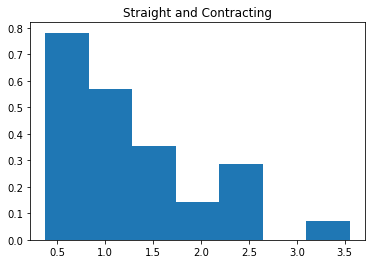

In [19]:
# Plot data
plt.hist(straight_contract, bins='auto', density=True);
plt.title('Straight and Contracting');

## Check normality

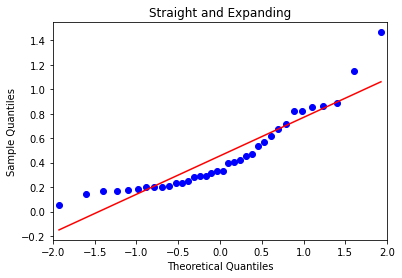

Straight and Expanding
 ---------- 
Shapiro test:
statistic=0.871 p=0.001
Sample does not look Gaussian (reject H0)


In [20]:
# from statsmodels.graphics.gofplots import qqplot
# QQ Plot
qqplot(straight_expand, line='s')
plt.title('Straight and Expanding');
plt.show()

# Shapiro-Wilk Test
from scipy.stats import shapiro

print('Straight and Expanding\n','-'*10,'\nShapiro test:')

# shapiro_test
shapiro_test = shapiro(straight_expand.values)
p = shapiro_test.pvalue
print(f'statistic={shapiro_test.statistic:.3f}','p=%.3f' % p)

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

---

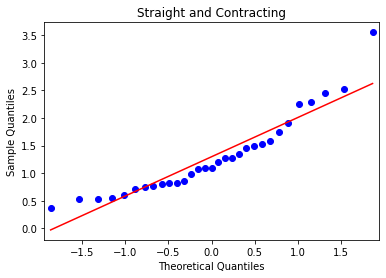

Straight and Contracting
 ---------- 
Shapiro test:
statistic=0.897 p=0.006
Sample does not look Gaussian (reject H0)


In [21]:
# QQ Plot
# from statsmodels.graphics.gofplots import qqplot
qqplot(straight_contract, line='s')
plt.title('Straight and Contracting');
plt.show()

# normality test
# Shapiro-Wilk Test

print('Straight and Contracting\n','-'*10,'\nShapiro test:')

# shapiro_test
shapiro_test = shapiro(straight_contract.values)
p = shapiro_test.pvalue
print(f'statistic={shapiro_test.statistic:.3f}','p=%.3f' % p)

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

---

## Mann-Whitney U test
> two groups are not paired.

In [22]:
import scipy.stats as stats

In [23]:
# stats.mannwhitneyu?

In [24]:
stats.mannwhitneyu(straight_expand, straight_contract, alternative=None)

MannwhitneyuResult(statistic=122.0, pvalue=2.1707828954386723e-08)

In [25]:
stats.mannwhitneyu(straight_expand, straight_contract, alternative='two-sided')

MannwhitneyuResult(statistic=122.0, pvalue=4.3415657908773446e-08)

In [26]:
stats.mannwhitneyu(straight_expand, straight_contract, alternative='less')

MannwhitneyuResult(statistic=122.0, pvalue=2.1707828954386723e-08)

## Wilcoxon signed-rank test
> two groups are paired.

In [27]:
print(f'straight_expand:{straight_expand.shape}; ', f'straight_contract:{straight_contract.shape}')

straight_expand:(36,);  straight_contract:(31,)


In [28]:
# stats.wilcoxon()

> ***paired*** a.k.a. dependent variables

## Plotting and saving graphs

### Task \#1

>    1) Combine two data (strait_contract & strait_expand) together as data frame. Use "concat" function in pandas.
>    2) Change the name of the colums as 'Strait_Contract' and 'Strait_Expand'.
>    3) Plot the data as boxplot. 
>    4) Add a y-axis label. 
>    5) Add a text "*" to show the result of statistical analyses.

In [29]:
# Combine two data together

# option 0:
# pd.DataFrame([straight_contract, straight_expand]).transpose()

# option 1:
pd.concat([straight_contract, straight_expand], axis=1)

,recoil speed [um/sec],recoil speed [um/sec]
2,NaN,0.452162
7,NaN,0.288298
9,0.709208,NaN
11,NaN,0.165716
14,0.752265,NaN
...,...,...
150,NaN,0.884911
152,NaN,0.570014
161,1.747350,NaN
163,0.806116,NaN


In [30]:
# Change the name of the colums as 'Strait_Contract' and 'Strait_Expand'.
df_strt = pd.DataFrame({"Straight Contract": straight_contract,
                        "Straight Expand"  : straight_expand} )
df_strt

,Straight Contract,Straight Expand
2,NaN,0.452162
7,NaN,0.288298
9,0.709208,NaN
11,NaN,0.165716
14,0.752265,NaN
...,...,...
150,NaN,0.884911
152,NaN,0.570014
161,1.747350,NaN
163,0.806116,NaN


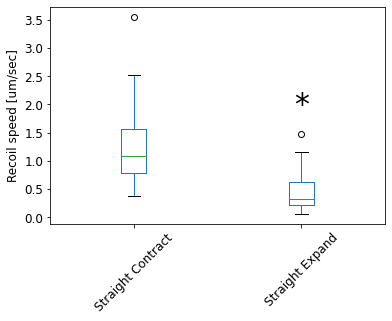

In [31]:
# Plot the data as boxplot.
ax = df_strt.boxplot(grid=False, rot=45, fontsize=12, return_type='axes')

# Add a y-axis label.
plt.ylabel('Recoil speed [um/sec]', fontsize=12);

# Add a text "*" to show the result of statistical analyses.

# option 1:
# you can get locations of the x-axis ticks using ax.xaxis.get_majorticklocs()
plt.text(2, np.nanmax(df_strt['Straight Expand'])*1.35, '*', ha = 'center',va='center', fontdict={'fontsize':30});

# option 2:
# plt.plot(2, np.nanmax(df_strt['Straight Expand'])*1.35, marker=r"$*$", ms=20, mec='k');

In [32]:
# df.boxplot?

### Task #2

>    0) Conduct a statistical test between the recoil velocities of i) Rn = '1.0-1.1' & Behavior 'Contracting', and ii) Rn = '1.1-1.5' & Behavior 'Contracting' (optional).
>    1) Use "swarmplot" function in seaborn to plot all the recoil speed in different categories. Search "sns.swarmplot" and learn how to use.
>    2) Change the order of the plots.
>    3) Add a text "*" to show the result of statistical analyses (optional).
>    4) Save the graph in 'png' format.

***Select Rough Contracting Junctions***

In [33]:
# Select rough (Rn='1.1-1.5') and contracting (Behavior='Contracting')
rough_contract = None # edit here

***Normality Test***

```
Rough and Contracting
 ---------- 
Shapiro test: statistic=0.957; p=0.262
```

In [34]:
# normality test
# Shapiro-Wilk Test


In [35]:
# QQ Plot for "Contracting Rough" junctions
# from statsmodels.graphics.gofplots import qqplot


***Mann-Whitney U Test***


>Test "Contracting Rough" and "Contracting Straight" using the Mann-Whitney U statistic
>```
The Mann-Whitney U: statistic=216.0
Half of 'two-sided' p-value: p-value=0.0001685895538312239
```

***Swarmplot***

> Produce a similar plot to this one:
>
>![](../images/swarmplot.png)

In [36]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.65)

In [37]:
# Plot the data as swarmplot.

# Add a text "*" to show the result of statistical analyses.
# hint: use ax.xaxis.get_majorticklocs() for x-axis locations of ['Contracting', 'Stable', 'Expanding', 'Rosette']


# Save the graph in 'png' format.
